# Example from mne site
https://mne.tools/dev/auto_examples/io/read_xdf.html#ex-read-xdf

C:\Users\user\anaconda3\envs\BCI-ALS\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Creating RawArray with float64 data, n_channels=3, n_times=2320128
    Range : 0 ... 2320127 =      0.000 ...   232.013 secs
Ready.
Using matplotlib as 2D backend.


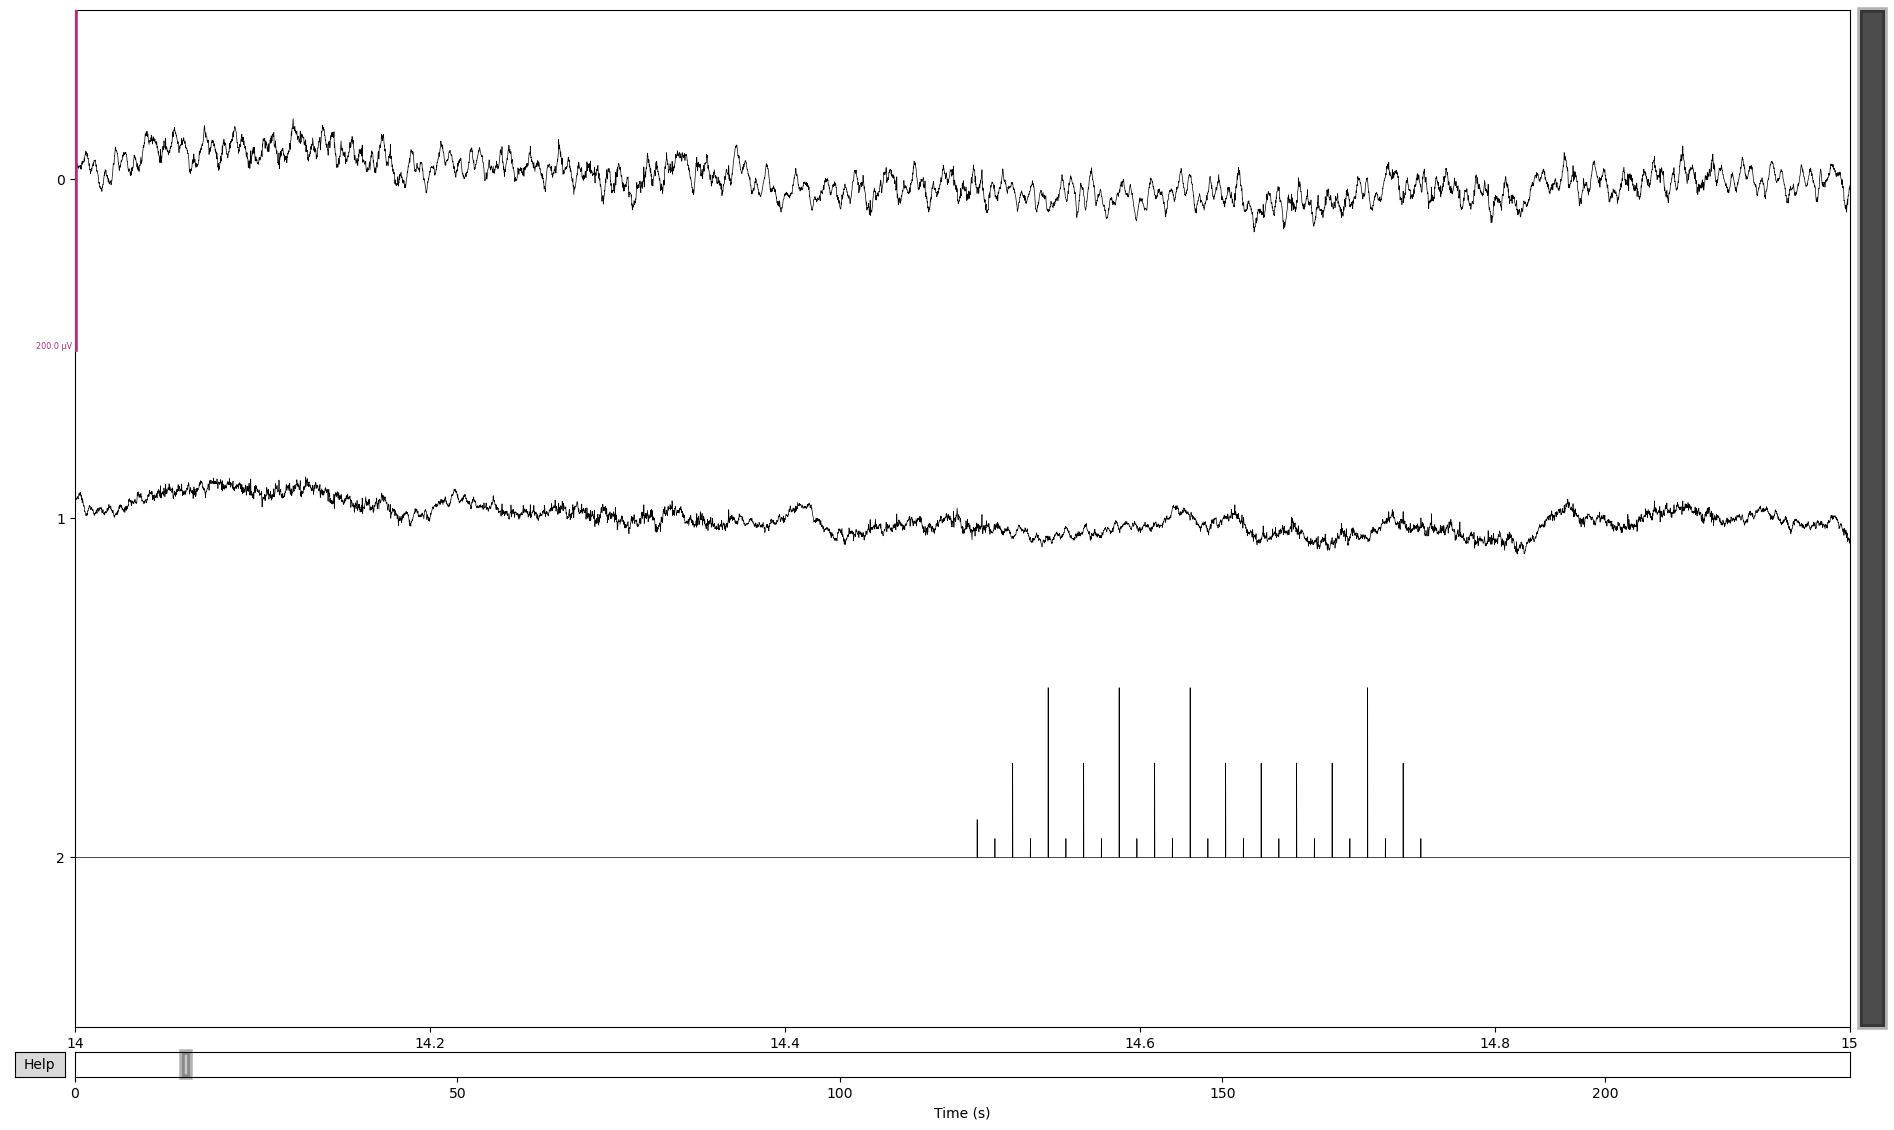

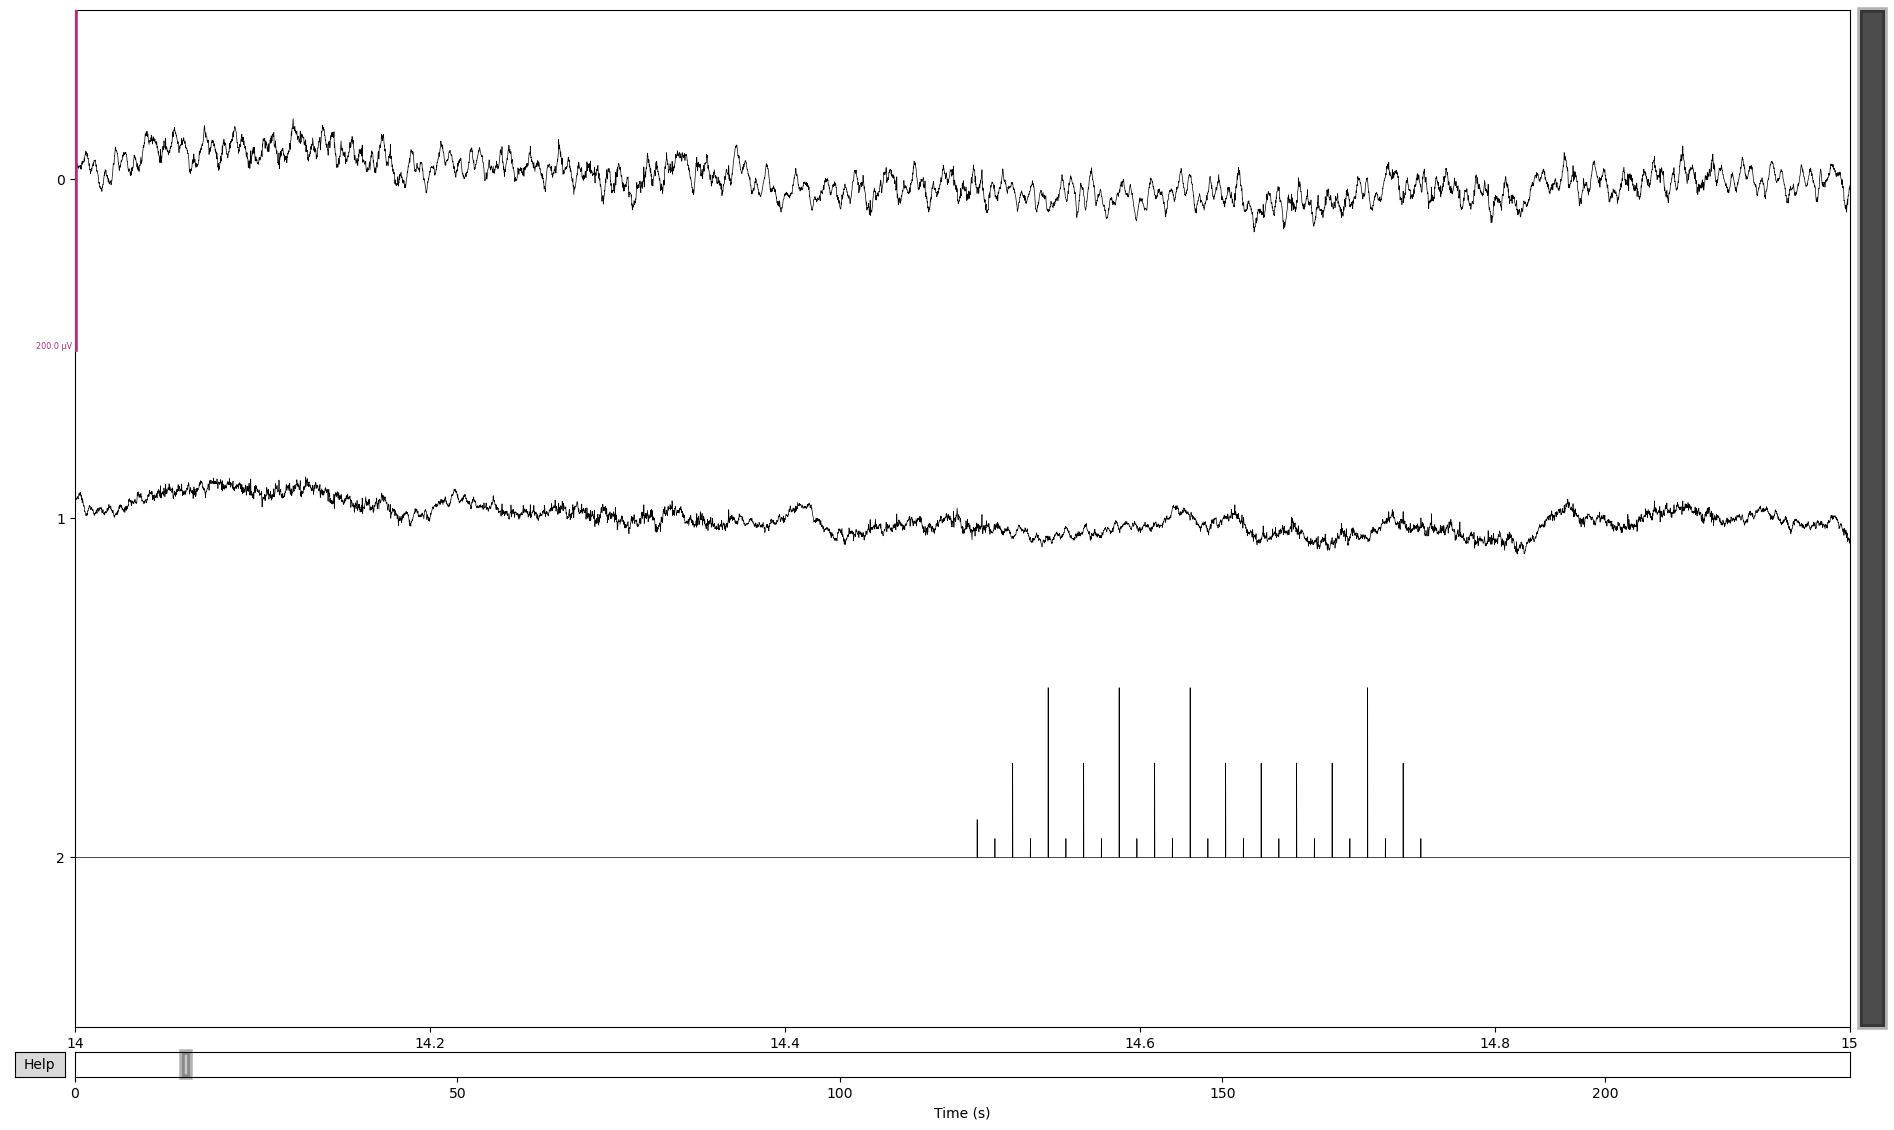

In [1]:
import pyxdf

import mne
from mne.datasets import misc

fname = (
    misc.data_path() / 'xdf' /
    'sub-P001_ses-S004_task-Default_run-001_eeg_a2.xdf')
streams, header = pyxdf.load_xdf(fname)
data = streams[0]["time_series"].T
assert data.shape[0] == 5  # four raw EEG plus one stim channel
data[:4:2] -= data[1:4:2]  # subtract (rereference) to get two bipolar EEG
data = data[::2]  # subselect
data[:2] *= (1e-6 / 50 / 2)  # uV -> V and preamp gain
sfreq = float(streams[0]["info"]["nominal_srate"][0])
info = mne.create_info(3, sfreq, ["eeg", "eeg", "stim"])
raw = mne.io.RawArray(data, info)
raw.plot(scalings=dict(eeg=100e-6), duration=1, start=14)

# Read Cython OpenBCI .xdf data

In [2]:
import pyxdf
import PyQt5
import mne
import numpy as np
import pathlib
import mne
import matplotlib
import matplotlib.pyplot as plt
# For interactive plots
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'qt')

## Set data path and read data

In [3]:
current_path = pathlib.Path().absolute()  
data_fname = current_path /'test1.xdf'
print(data_fname)
streams, header = pyxdf.load_xdf(data_fname)

C:\Users\user\Documents\BCI_ALS\test1.xdf


## before we are able to create a MNE raw instance, we need to create "info" object and prepare the data
(https://mne.tools/stable/auto_tutorials/simulation/10_array_objs.html#sphx-glr-auto-tutorials-simulation-10-array-objs-py)

Look for data[0:13] and data[13:], the first 13 rows should contain the actual electrode while the last 3 contains the Na channels 

Creating RawArray with float64 data, n_channels=13, n_times=16760
    Range : 0 ... 16759 =      0.000 ...   134.072 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Filter length: 825 samples (6.600 sec)



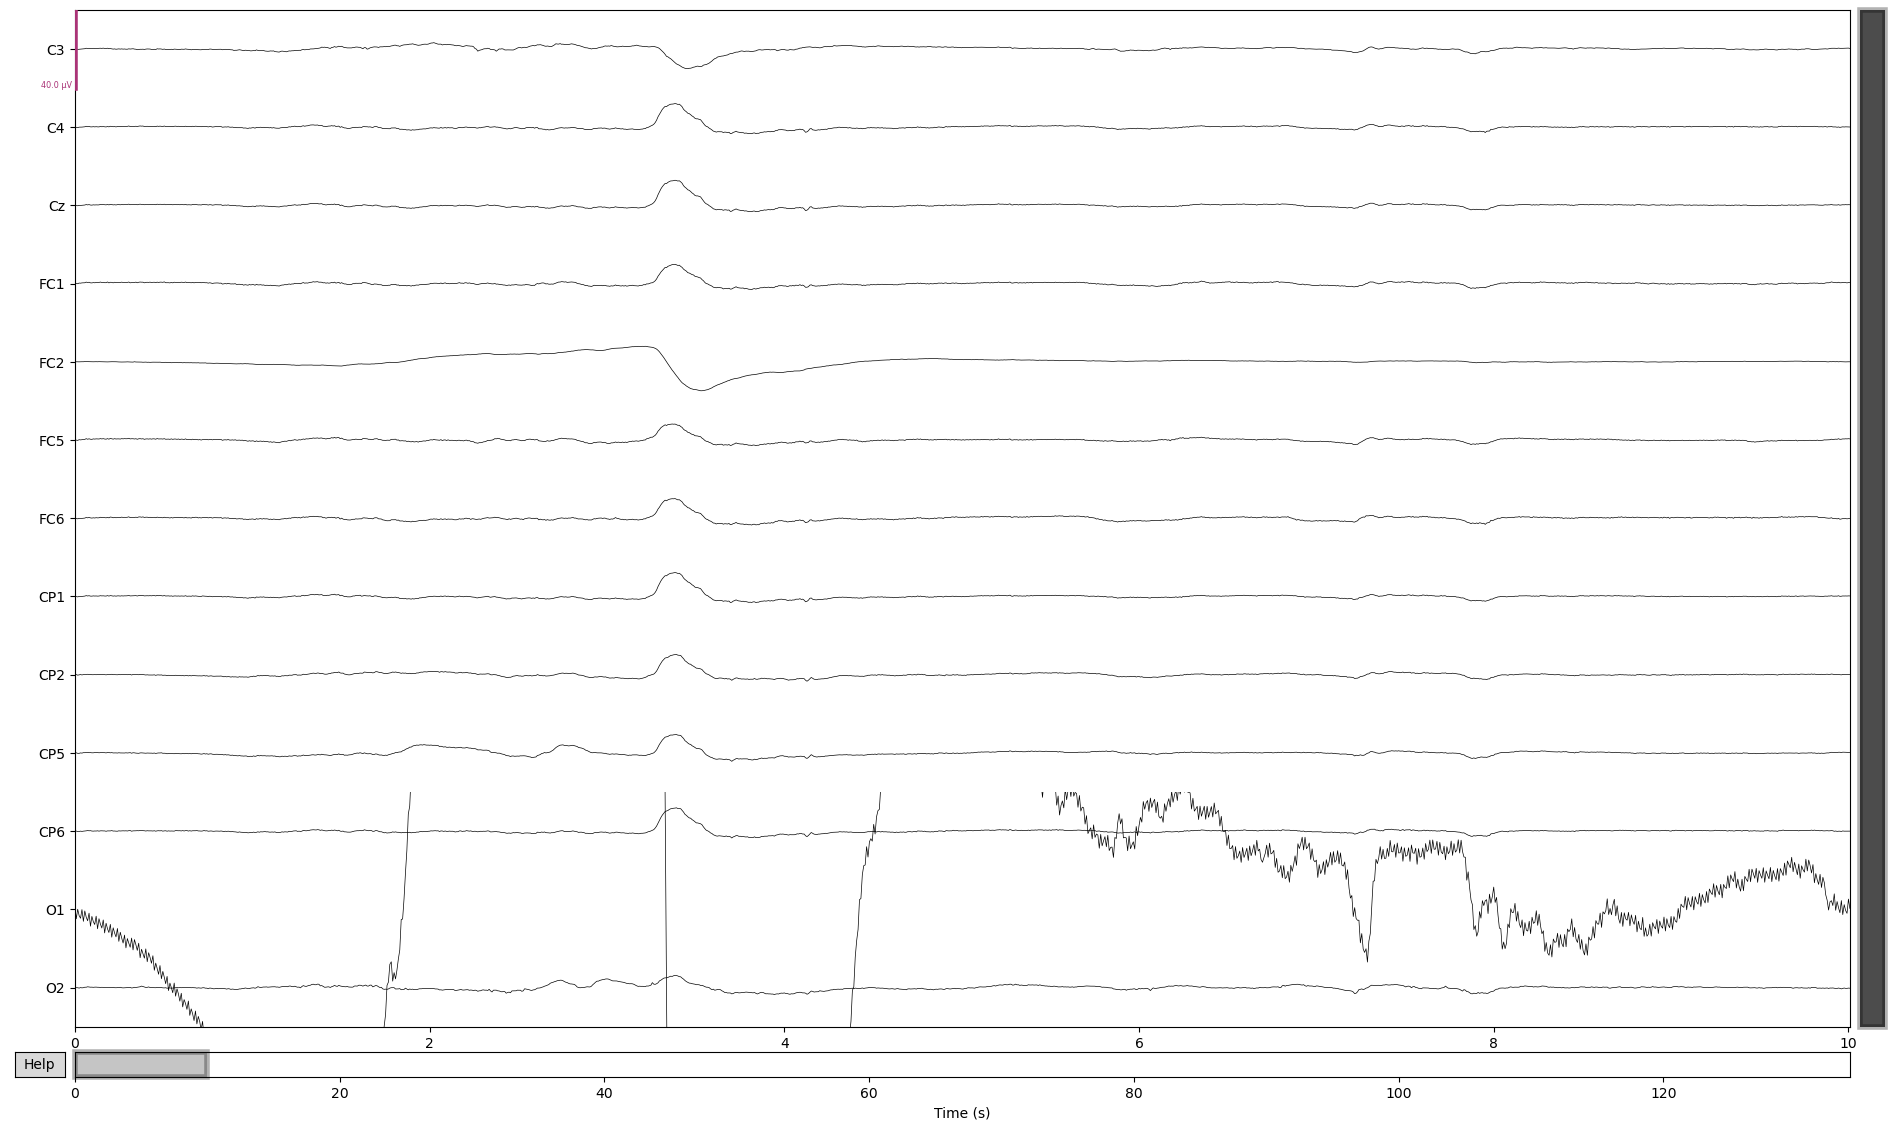

In [4]:
ch_types = ['eeg'] * 13
ch_names = ['C3','C4','Cz','FC1','FC2','FC5','FC6','CP1','CP2','CP5','CP6','O1','O2']



data = streams[0]["time_series"].T
assert data.shape[0] == 16  
data = data[0:13]
#data[:4:2] -= data[1:4:2]  # subtract (rereference) to get two bipolar EEG
#data = data[::2]  # subselect
data *= (1e-6 / 50 / 2)  # Not sure if that is the correct way (uV -> V and preamp gain)
sfreq = float(streams[0]["info"]["nominal_srate"][0])
info = mne.create_info(ch_names= ch_names, ch_types=ch_types, sfreq=sfreq)
info.set_montage('standard_1020')
raw = mne.io.RawArray(data, info)
raw_filter = raw.filter(l_freq = 0.5, h_freq = 60)
raw_filter.plot()
#raw_filter.plot(scalings=dict(eeg=100e-6), duration=1, start=14)

We can also plot sensor locations:

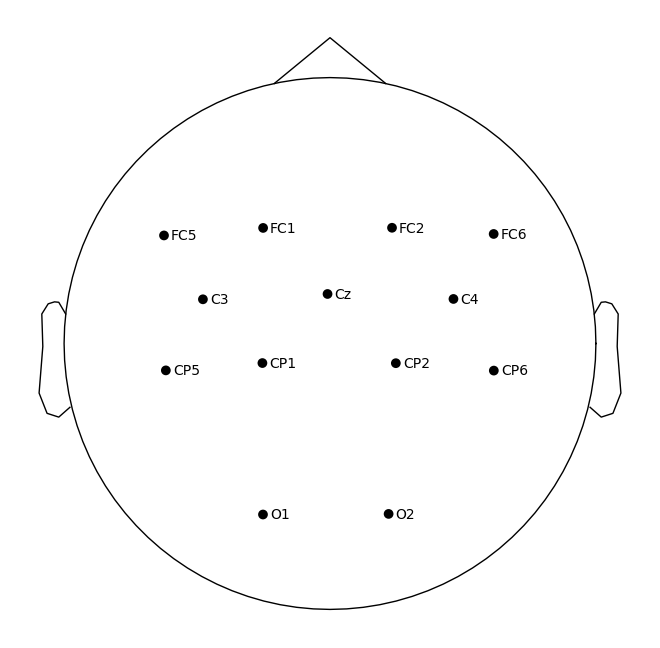

In [5]:
raw.plot_sensors(show_names= True)

In **3d** its even cooler:

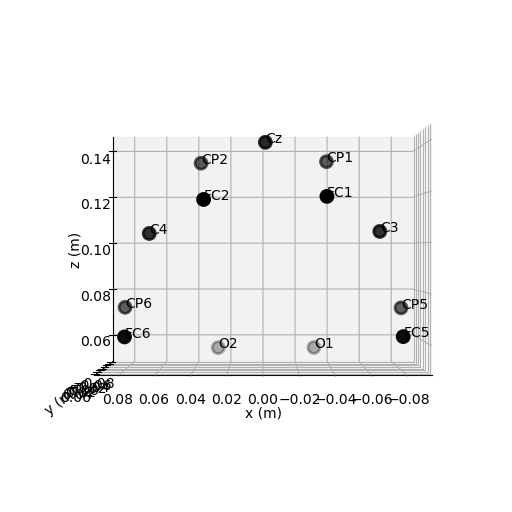

In [6]:
raw.plot_sensors(show_names= True,kind= '3d')